In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import draft results table
df1 = pd.read_csv("2019 draft/Draft results.csv")
df1.head(10)

,Pick,Player,Team,Draft Trades,Pos,HT,WT,Age,YOS,Pre-Draft Team,Class,Nationality,year
0,1,Blake Griffin,LAC,,PF,6-10,250,20,9,Oklahoma,So,United States,2009
1,2,Hasheem Thabeet,MEM,,C,7-3,265,22,5,Connecticut,Jr,Tanzania,2009
2,3,James Harden,OKC,,SG,6-5,220,19,9,Arizona State,So,United States,2009
3,4,Tyreke Evans,SAC,,G,6-6,220,19,9,Memphis,Fr,United States,2009
4,5,Ricky Rubio,MIN,,G,6-4,190,18,7,Divina Seguros Joventut (Spain),1990 DOB,Spain,2009
5,6,Jonny Flynn,MIN,,PG,5-10,196,20,3,Syracuse,So,United States,2009
6,7,Stephen Curry,GOS,,G,6-3,190,21,9,Davidson,Jr,United States,2009
7,8,Jordan Hill,NYK,,PF,6-10,240,21,8,Arizona,Jr,United States,2009
8,9,DeMar DeRozan,TOR,,GF,6-7,220,19,9,USC,Fr,United States,2009
9,10,Brandon Jennings,MIL,,G,6-1,170,19,9,Virtus Roma (Italy),1989 DOB,United States,2009


In [3]:
#rename class to colyear for merging
df1.rename({'Class': 'colyear'}, axis=1, inplace=True)

In [4]:
#check column names
df1.columns

Index(['Pick', 'Player', 'Team', 'Draft Trades', 'Pos', 'HT', 'WT', 'Age',
       'YOS', 'Pre-Draft Team', 'colyear', 'Nationality', 'year'],
      dtype='object')

In [5]:
#import advanced stats table
df2 = pd.read_csv("2019 draft/Adv_stats.csv")
df2.head()

,#,Player,Team,TS%,eFG%,Total S %,ORB%,DRB%,TRB%,AST%,...,PPR,PPS,ORtg,DRtg,eDiff,FIC,PER,year,position,class
0,1,Seth Curry,LIB,.544,0.505,159.7,2.3,11.2,7.0,13.9,...,-2.2,1.2,110.7,100.4,10.2,366.6,21.8,2009,PG,Fr
1,2,Matt Dickey,UNCA,.612,0.569,168.3,4.3,11.9,8.2,22.8,...,-2.7,1.4,110.9,103.9,7.1,212.1,19.2,2009,PG,Fr
2,3,Isaiah Thomas,UW,.511,0.463,139.3,2.8,8.7,5.8,18.1,...,-2.9,1.3,106.3,98.3,8.0,231.9,17.7,2009,PG,Fr
3,4,Paul McCoy,SMU,.528,0.506,147.2,3.7,9.9,6.8,20.0,...,-1.6,1.2,105.1,103.5,1.6,238.2,17.0,2009,PG,Fr
4,5,Erving Walker,UF,.598,0.566,163.8,0.8,6.3,3.6,17.3,...,0.4,1.4,115.6,102.6,12.9,212.9,16.6,2009,PG,Fr


In [6]:
#check column names
df2.columns

Index(['#', 'Player', 'Team', 'TS%', 'eFG%', 'Total S %', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg',
       'DRtg', 'eDiff', 'FIC', 'PER', 'year', 'position', 'class'],
      dtype='object')

In [7]:
#check shapes
print(df1.shape)
print(df2.shape)

(1193, 13)
(26228, 24)


In [8]:
#change column name for merging
df2.rename({'class': 'colyear'}, axis=1, inplace=True)

In [9]:
#change column type for merging
df2['year'] = df2['year'].astype(str)
df1['year'] = df1['year'].astype(str)
df2['colyear'] = df2['colyear'].astype(str)
df1['colyear'] = df1['colyear'].astype(str)
df2['Player'] = df2['Player'].astype(str)
df1['Player'] = df1['Player'].astype(str)

In [10]:
#remove any spaces for merging
df1.year = df1.year.str.strip()
df2.year = df2.year.str.strip()
df1.colyear = df1.colyear.str.strip()
df2.colyear = df2.colyear.str.strip()
df1.Player = df1.Player.str.strip()
df2.Player = df2.Player.str.strip()

In [11]:
#merga two tables togther on player, colyear, and year to avoid duplicate coluns
df = pd.merge(df2, df1, how='left', on=['Player','colyear','year'])
df.head()

,#,Player,Team_x,TS%,eFG%,Total S %,ORB%,DRB%,TRB%,AST%,...,Pick,Team_y,Draft Trades,Pos,HT,WT,Age,YOS,Pre-Draft Team,Nationality
0,1,Seth Curry,LIB,.544,0.505,159.7,2.3,11.2,7.0,13.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Matt Dickey,UNCA,.612,0.569,168.3,4.3,11.9,8.2,22.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Isaiah Thomas,UW,.511,0.463,139.3,2.8,8.7,5.8,18.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Paul McCoy,SMU,.528,0.506,147.2,3.7,9.9,6.8,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Erving Walker,UF,.598,0.566,163.8,0.8,6.3,3.6,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#check the draft table for Kemba Walker
df1[df1['Player'].str.contains('Kemba Walker')]

,Pick,Player,Team,Draft Trades,Pos,HT,WT,Age,YOS,Pre-Draft Team,colyear,Nationality,year
128,9,Kemba Walker,CHA,,G,6-1,184,21,7,Connecticut,Jr,United States,2011


In [13]:
#check the adv stats tabel for Kemba Walker
df2[df2['Player'].str.contains('Kemba Walker')]

,#,Player,Team,TS%,eFG%,Total S %,ORB%,DRB%,TRB%,AST%,...,PPR,PPS,ORtg,DRtg,eDiff,FIC,PER,year,position,colyear
5,6,Kemba Walker,UConn,.549,0.498,145.6,3.9,10.2,7.3,20.8,...,0.4,1.4,110.4,94.3,16.1,253.9,16.5,2009,PG,Fr
2700,5,Kemba Walker,UConn,.528,0.456,151.2,3.0,9.7,6.5,28.7,...,1.2,1.3,109.4,97.9,11.6,383.2,19.2,2010,PG,So
5536,1,Kemba Walker,UConn,.543,0.478,157.7,3.9,11.5,7.9,28.0,...,2.0,1.3,120.9,97.8,23.1,620.1,27.9,2011,PG,Jr


In [14]:
#check if the two tables merged correctly
df[df['Player'].str.contains('Kemba Walker')]

,#,Player,Team_x,TS%,eFG%,Total S %,ORB%,DRB%,TRB%,AST%,...,Pick,Team_y,Draft Trades,Pos,HT,WT,Age,YOS,Pre-Draft Team,Nationality
5,6,Kemba Walker,UConn,.549,0.498,145.6,3.9,10.2,7.3,20.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2700,5,Kemba Walker,UConn,.528,0.456,151.2,3.0,9.7,6.5,28.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5536,1,Kemba Walker,UConn,.543,0.478,157.7,3.9,11.5,7.9,28.0,...,9.0,CHA,,G,6-1,184.0,21.0,7.0,Connecticut,United States


In [15]:
#check if the the year drafted is correct 
df4 = df[['Player','year', 'Pick','colyear','position','Pos']]
df4[df4['Player'].str.contains('Kemba Walker')]

,Player,year,Pick,colyear,position,Pos
5,Kemba Walker,2009,NaN,Fr,PG,NaN
2700,Kemba Walker,2010,NaN,So,PG,NaN
5536,Kemba Walker,2011,9.0,Jr,PG,G


In [16]:
#change all columns in the df to strings 
df = df.astype(str)

In [17]:
#check for any duplicate rows in df
print(df.duplicated(['Player','year','position','colyear']).sum())
print(df.duplicated().sum())

5
0


In [18]:
#remove duplicate rows
df = df.loc[~df.duplicated(['Player','year','Pick','colyear']), :]

In [19]:
print(df1.shape)
print(df2.shape)
print(df.shape)

(1193, 13)
(26228, 24)
(25399, 34)


In [20]:
#rename team_y to nba_team
df.rename({'Team_y': 'Nba_team'}, axis=1, inplace=True)

In [21]:
#check df columns
df.columns

Index(['#', 'Player', 'Team_x', 'TS%', 'eFG%', 'Total S %', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg',
       'DRtg', 'eDiff', 'FIC', 'PER', 'year', 'position', 'colyear', 'Pick',
       'Nba_team', 'Draft Trades', 'Pos', 'HT', 'WT', 'Age', 'YOS',
       'Pre-Draft Team', 'Nationality'],
      dtype='object')

In [22]:
#replace any nans with 0
df= df.replace({'nan':0})
#df.isna().sum()

In [23]:
#change columns with numeric data to numeric
cols = ['TS%', 'eFG%', 'Total S %', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg',
       'eDiff', 'FIC', 'PER', 'year', 'Pick','WT', 'Age', 'YOS']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [24]:
df.isna().sum()

#                 0
Player            0
Team_x            0
TS%               2
eFG%              0
Total S %         0
ORB%              0
DRB%              0
TRB%              0
AST%              0
TOV%              0
STL%              0
BLK%              0
USG%              0
PPR               0
PPS               0
ORtg              0
DRtg              0
eDiff             0
FIC               0
PER               0
year              0
position          0
colyear           0
Pick              0
Nba_team          0
Draft Trades      0
Pos               0
HT                0
WT                0
Age               0
YOS               0
Pre-Draft Team    0
Nationality       0
dtype: int64

In [25]:
#check column types
df.dtypes

#                  object
Player             object
Team_x             object
TS%               float64
eFG%              float64
Total S %         float64
ORB%              float64
DRB%              float64
TRB%              float64
AST%              float64
TOV%              float64
STL%              float64
BLK%              float64
USG%              float64
PPR               float64
PPS               float64
ORtg              float64
DRtg              float64
eDiff             float64
FIC               float64
PER               float64
year              float64
position           object
colyear            object
Pick              float64
Nba_team           object
Draft Trades       object
Pos                object
HT                 object
WT                float64
Age               float64
YOS               float64
Pre-Draft Team     object
Nationality        object
dtype: object

In [26]:
df.head()

,#,Player,Team_x,TS%,eFG%,Total S %,ORB%,DRB%,TRB%,AST%,...,Pick,Nba_team,Draft Trades,Pos,HT,WT,Age,YOS,Pre-Draft Team,Nationality
0,1,Seth Curry,LIB,0.544,0.505,159.7,2.3,11.2,7.0,13.9,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0
1,2,Matt Dickey,UNCA,0.612,0.569,168.3,4.3,11.9,8.2,22.8,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0
2,3,Isaiah Thomas,UW,0.511,0.463,139.3,2.8,8.7,5.8,18.1,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0
3,4,Paul McCoy,SMU,0.528,0.506,147.2,3.7,9.9,6.8,20.0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0
4,5,Erving Walker,UF,0.598,0.566,163.8,0.8,6.3,3.6,17.3,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0


In [27]:
#split hight column to two (used to calculate cms)
df[['HT','Inches']] = df['HT'].str.split('-',expand=True)
df

,#,Player,Team_x,TS%,eFG%,Total S %,ORB%,DRB%,TRB%,AST%,...,Nba_team,Draft Trades,Pos,HT,WT,Age,YOS,Pre-Draft Team,Nationality,Inches
0,1,Seth Curry,LIB,0.544,0.505,159.7,2.3,11.2,7.0,13.9,...,0,0,0,NaN,0.0,0.0,0.0,0,0,NaN
1,2,Matt Dickey,UNCA,0.612,0.569,168.3,4.3,11.9,8.2,22.8,...,0,0,0,NaN,0.0,0.0,0.0,0,0,NaN
2,3,Isaiah Thomas,UW,0.511,0.463,139.3,2.8,8.7,5.8,18.1,...,0,0,0,NaN,0.0,0.0,0.0,0,0,NaN
3,4,Paul McCoy,SMU,0.528,0.506,147.2,3.7,9.9,6.8,20.0,...,0,0,0,NaN,0.0,0.0,0.0,0,0,NaN
4,5,Erving Walker,UF,0.598,0.566,163.8,0.8,6.3,3.6,17.3,...,0,0,0,NaN,0.0,0.0,0.0,0,0,NaN
5,6,Kemba Walker,UConn,0.549,0.498,145.6,3.9,10.2,7.3,20.8,...,0,0,0,NaN,0.0,0.0,0.0,0,0,NaN
6,7,R.J. Evans,HC,0.482,0.465,123.3,8.8,13.1,10.8,13.5,...,0,0,0,NaN,0.0,0.0,0.0,0,0,NaN
7,8,Courtney Fortson,U of A,0.495,0.467,133.7,5.6,12.8,9.1,36.4,...,0,0,0,NaN,0.0,0.0,0.0,0,0,NaN
8,9,Ben Drayton III,GSU,0.591,0.559,168.7,2.5,7.6,5.0,20.1,...,0,0,0,NaN,0.0,0.0,0.0,0,0,NaN
9,10,Doug Davis,PRIN,0.552,0.535,156.8,1.5,6.9,4.4,10.9,...,0,0,0,NaN,0.0,0.0,0.0,0,0,NaN


In [28]:
#change columns with numeric data to numeric
cols = ['HT','Inches']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [29]:
#create a new column with hight in cm
df['hight'] = round((df['HT']*12 + df['Inches'])*2.54,0)

In [30]:
#check if it worked
df[df['Player'].str.contains('Kemba Walker')]

,#,Player,Team_x,TS%,eFG%,Total S %,ORB%,DRB%,TRB%,AST%,...,Draft Trades,Pos,HT,WT,Age,YOS,Pre-Draft Team,Nationality,Inches,hight
5,6,Kemba Walker,UConn,0.549,0.498,145.6,3.9,10.2,7.3,20.8,...,0,0,NaN,0.0,0.0,0.0,0,0,NaN,NaN
2700,5,Kemba Walker,UConn,0.528,0.456,151.2,3.0,9.7,6.5,28.7,...,0,0,NaN,0.0,0.0,0.0,0,0,NaN,NaN
5536,1,Kemba Walker,UConn,0.543,0.478,157.7,3.9,11.5,7.9,28.0,...,,G,6.0,184.0,21.0,7.0,Connecticut,United States,1.0,185.0


In [31]:
#change colyear column and position to numeric

df.colyear.replace(['Fr', 'So', 'Jr','Sr'], ['1','2','3','4'], inplace=True)
df.position.replace(['PG','SG','SF','PF','C'], ['1','2','3','4','5'], inplace=True)


In [32]:
cols = ['colyear','position']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [33]:
#create draft results column
df['drafted'] = np.where(df['Pick']== 0, 0, 1)

In [34]:
#check again all changes
df[df['Player'].str.contains('Kemba Walker')]

,#,Player,Team_x,TS%,eFG%,Total S %,ORB%,DRB%,TRB%,AST%,...,Pos,HT,WT,Age,YOS,Pre-Draft Team,Nationality,Inches,hight,drafted
5,6,Kemba Walker,UConn,0.549,0.498,145.6,3.9,10.2,7.3,20.8,...,0,NaN,0.0,0.0,0.0,0,0,NaN,NaN,0
2700,5,Kemba Walker,UConn,0.528,0.456,151.2,3.0,9.7,6.5,28.7,...,0,NaN,0.0,0.0,0.0,0,0,NaN,NaN,0
5536,1,Kemba Walker,UConn,0.543,0.478,157.7,3.9,11.5,7.9,28.0,...,G,6.0,184.0,21.0,7.0,Connecticut,United States,1.0,185.0,1


In [35]:
#drop Aall columns with high zero values 

df_final = df.drop(['Nba_team', 'Draft Trades', 'Pos', 'HT', 'WT', 'Age', 'YOS',
         'Pre-Draft Team', 'Nationality','Inches','hight'], axis = 1)

In [36]:
df_final.columns

Index(['#', 'Player', 'Team_x', 'TS%', 'eFG%', 'Total S %', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg',
       'DRtg', 'eDiff', 'FIC', 'PER', 'year', 'position', 'colyear', 'Pick',
       'drafted'],
      dtype='object')

In [37]:
#change columns with numeric data to numeric
cols = ['position', 'colyear']
df_final[cols] = df_final[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [38]:
#check column types
df_final.dtypes

#             object
Player        object
Team_x        object
TS%          float64
eFG%         float64
Total S %    float64
ORB%         float64
DRB%         float64
TRB%         float64
AST%         float64
TOV%         float64
STL%         float64
BLK%         float64
USG%         float64
PPR          float64
PPS          float64
ORtg         float64
DRtg         float64
eDiff        float64
FIC          float64
PER          float64
year         float64
position       int64
colyear        int64
Pick         float64
drafted        int64
dtype: object

In [39]:
#drop any Na columns
df_final.dropna

<bound method DataFrame.dropna of          #              Player   Team_x    TS%   eFG%  Total S %  ORB%  DRB%  \
0        1          Seth Curry      LIB  0.544  0.505      159.7   2.3  11.2   
1        2         Matt Dickey     UNCA  0.612  0.569      168.3   4.3  11.9   
2        3       Isaiah Thomas       UW  0.511  0.463      139.3   2.8   8.7   
3        4          Paul McCoy      SMU  0.528  0.506      147.2   3.7   9.9   
4        5       Erving Walker       UF  0.598  0.566      163.8   0.8   6.3   
5        6        Kemba Walker    UConn  0.549  0.498      145.6   3.9  10.2   
6        7          R.J. Evans       HC  0.482  0.465      123.3   8.8  13.1   
7        8    Courtney Fortson   U of A  0.495  0.467      133.7   5.6  12.8   
8        9     Ben Drayton III      GSU  0.591  0.559      168.7   2.5   7.6   
9       10          Doug Davis     PRIN  0.552  0.535      156.8   1.5   6.9   
10      11       Daniel Bryant      ASU  0.485  0.465      133.9   2.4  11.1   
11    

In [40]:
df_final.isna().sum()

#            0
Player       0
Team_x       0
TS%          2
eFG%         0
Total S %    0
ORB%         0
DRB%         0
TRB%         0
AST%         0
TOV%         0
STL%         0
BLK%         0
USG%         0
PPR          0
PPS          0
ORtg         0
DRtg         0
eDiff        0
FIC          0
PER          0
year         0
position     0
colyear      0
Pick         0
drafted      0
dtype: int64

In [41]:
#check to see if any columns still have zero values 
(df_final == 0).sum()

#                0
Player           0
Team_x           0
TS%              0
eFG%             0
Total S %        0
ORB%            12
DRB%             1
TRB%             1
AST%             3
TOV%             0
STL%             9
BLK%          1660
USG%             0
PPR            268
PPS              0
ORtg             0
DRtg             0
eDiff           69
FIC              0
PER              1
year             0
position         0
colyear          0
Pick         24948
drafted      24948
dtype: int64

In [42]:
#col = ['ORB%','DRB%','TRB%','AST%','STL%','BLK%','PPR','eDiff','PER',
       #'3PM','3PA','3P%','FTM','FTA','FT%','ORB','DRB','REB','AST','BLK']
#for i in col:
    #min_value = df_final[i].min(skipna=True)
    #df_final[i] = df_final[i].replace(0,min_value)

In [43]:
#(df_final == 0).sum()

## Feature Selection

In [44]:
#check the coefficient of variation of each column 
coefficient_of_variation = (df_final.std()/df_final.mean())*100
coefficient_of_variation.sort_values(ascending=[False])

Pick         867.024840
drafted      743.769125
eDiff        423.864329
BLK%         119.681844
ORB%          73.530561
AST%          56.940487
STL%          51.402237
FIC           49.993602
position      49.419863
TRB%          42.853717
colyear       39.314159
PER           37.087554
DRB%          36.901049
TOV%          31.304722
USG%          24.434000
Total S %     14.408387
PPS           13.775038
eFG%          12.708963
TS%           10.775897
ORtg          10.656644
DRtg           6.036678
year           0.157491
PPR         -130.063805
#                   NaN
dtype: float64

In [45]:
#drop features with +100% coefficient_of_variation and very low %
df_final = df_final.drop(['BLK%','eDiff','PPR','DRtg','ORtg','TS%','PPS','Total S %','USG%'], axis = 1)

In [46]:
#split the data into train and test split
df_final_train = df_final[df_final['year'].isin([2009,2010,2011,2012,2013,2015,2016,2017])]
df_final_test = df_final[df_final['year'].isin([2018])]

In [47]:
#check the shape of the data
df_final_train.shape

(18367, 17)

In [48]:
df_final.columns

Index(['#', 'Player', 'Team_x', 'eFG%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%',
       'STL%', 'FIC', 'PER', 'year', 'position', 'colyear', 'Pick', 'drafted'],
      dtype='object')

In [49]:
df_final = df_final.fillna(0)

In [50]:
# Split into features and target / train-test split
X_train = df_final_train.iloc[:,3:-2]
y_train = df_final_train.iloc[:, -1]

X_test = df_final_test.iloc[:,3:-2]
y_test = df_final_test.iloc[:, -1]

In [51]:
#check the shape of 
print(X_train.shape)
print(y_train.shape)

(18367, 12)
(18367,)


In [52]:
#show the final list of columns with teh coefficient_of_variation
coefficient_of_variation2 = (X_train.std()/X_train.mean())*100
coefficient_of_variation2.sort_values(ascending=[False])

ORB%        70.901817
AST%        56.945565
STL%        53.575141
FIC         50.316097
position    49.427257
TRB%        42.921539
colyear     39.213050
DRB%        36.942719
PER         35.749789
TOV%        31.410357
eFG%        12.696530
year         0.135181
dtype: float64

In [53]:
#show the above in a cleaner dataframe
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'coefficient_of_variation': coefficient_of_variation2
                             })

results_frame_sorted = results_frame.sort_values(by='coefficient_of_variation',ascending=[False])
results_frame_sorted

,feature,coefficient_of_variation
ORB%,ORB%,70.901817
AST%,AST%,56.945565
STL%,STL%,53.575141
FIC,FIC,50.316097
position,position,49.427257
TRB%,TRB%,42.921539
colyear,colyear,39.213050
DRB%,DRB%,36.942719
PER,PER,35.749789
TOV%,TOV%,31.410357


In [54]:
#check for the mutual info score of each feature

from sklearn.metrics import adjusted_mutual_info_score

mutual_info_scores = []

for feature in X_train.columns:
    #calcualte the mutual info score
    m_info = adjusted_mutual_info_score(X_train[feature], y_train)
    #append it to our list
    mutual_info_scores.append(m_info)

In [55]:
#put the mutual info score in a dataframe
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'mutual_info_scores': mutual_info_scores
                             })

results_frame_sorted = results_frame.sort_values(by='mutual_info_scores',ascending=[False])
results_frame_sorted

,feature,mutual_info_scores
8,PER,0.005093
7,FIC,0.003854
3,TRB%,0.001278
2,DRB%,0.001268
10,position,0.000877
0,eFG%,0.000776
1,ORB%,0.000560
11,colyear,0.000407
4,AST%,0.000390
5,TOV%,0.000220


[]

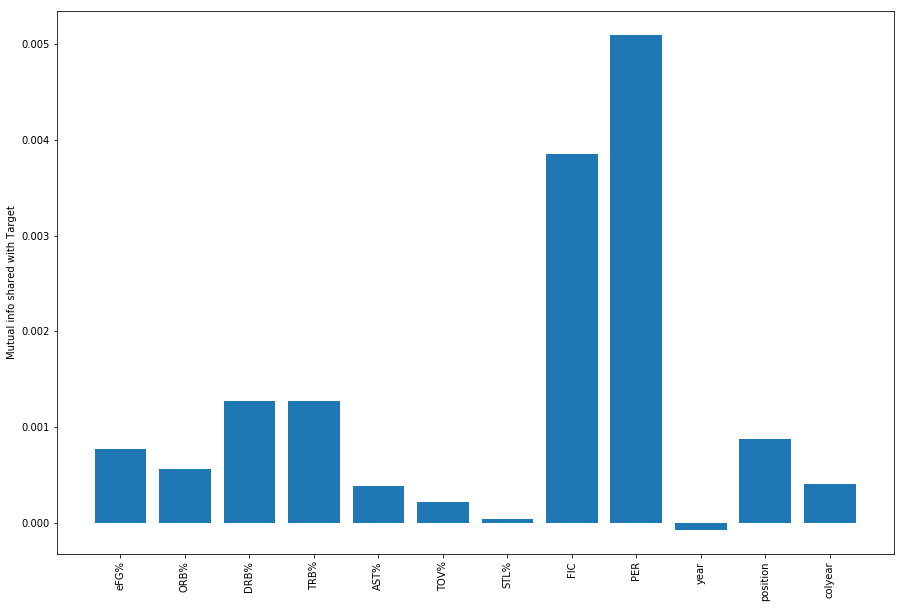

In [56]:
#plot the results
plt.figure(figsize=(15,10))
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual info shared with Target')
plt.xticks(rotation=90)
plt.plot()

In [57]:
# check the 0 & 1 counts
y_train.value_counts()

0    18004
1      363
Name: drafted, dtype: int64

# Build the model, check score, and results 

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scale the data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
#scale the X_train res and X_test data
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score
# Instantiate and fit
logistic_regression_model = LogisticRegression(solver = 'lbfgs')
logistic_regression_model.fit(X_train, y_train)

# predict
y_pred_train = logistic_regression_model.predict(X_train)
y_pred_test = logistic_regression_model.predict(X_test)

# Evaluate it
train_f1_score  = f1_score(y_train,y_pred_train)
test_f1_score = f1_score(y_test,y_pred_test)
test_recall_score = recall_score(y_test,y_pred_test)
print(f"The classification train f1_score is: {train_f1_score:0.3f}")
print(f"The classification test f1_socre is: {test_f1_score:0.3f}")
print(f"The classification test recall_score is: {test_recall_score:0.3f}")
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))

The classification train f1_score is: 0.304
The classification test f1_socre is: 0.281
The classification test recall_score is: 0.178
Confusion Matrix:
 [[2266    4]
 [  37    8]]


In [63]:
#check the coefficient of each feature
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'coefficient': logistic_regression_model.coef_[0]
                             })

results_frame_sorted = results_frame.sort_values(by='coefficient')
results_frame_sorted

,feature,coefficient
2,DRB%,-1.503213
1,ORB%,-1.241131
4,AST%,-0.542824
11,colyear,-0.520370
0,eFG%,-0.371226
6,STL%,-0.214419
9,year,-0.081473
10,position,0.215093
5,TOV%,0.477013
8,PER,0.702262


0.9309838472834068


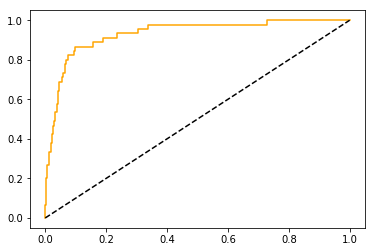

In [64]:
#Check the AUC curve
y_test_proba = logistic_regression_model.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='orange')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.show()

In [65]:
#get the threshold where recall score = 70%
thresholds[tpr> 0.7]*100

array([6.63004800e+00, 6.59761272e+00, 6.58076148e+00, 6.08579802e+00,
       6.04481864e+00, 5.98547962e+00, 5.96340167e+00, 5.72333614e+00,
       5.69278538e+00, 5.29325257e+00, 5.26081278e+00, 4.24247197e+00,
       4.20369169e+00, 4.00755234e+00, 3.97551020e+00, 2.17518610e+00,
       2.16526672e+00, 1.55613766e+00, 1.55582725e+00, 1.05580576e+00,
       1.05556906e+00, 6.65351259e-01, 6.64542474e-01, 5.27839400e-01,
       5.23522494e-01, 8.21481199e-02, 8.20558688e-02, 4.27769484e-07])

In [66]:
y_pred_proba = (logistic_regression_model.predict_proba(X_test,)[:,1]>0.0663).astype(bool)

print('Recall:', recall_score(y_test, y_pred_proba))
print('Precision:', precision_score(y_test, y_pred_proba))
print('f1:', f1_score(y_test, y_pred_proba))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_proba))

Recall: 0.7111111111111111
Precision: 0.2
f1: 0.31219512195121946
Confusion Matrix:
 [[2142  128]
 [  13   32]]


In [67]:
#count of all  draft values == 1
y_pred_proba.sum()

160

In [68]:
# show results of y predictions and the probability of each player getting drafted
y_pred_proba_drafted = df_final_test[y_pred_proba ==1]
y_pred_proba_drafted['y_pred_prob'] = logistic_regression_model.predict_proba(X_test)[:,1][y_pred_proba ==1]

In [69]:
y_pred_proba_drafted

,#,Player,Team_x,eFG%,ORB%,DRB%,TRB%,AST%,TOV%,STL%,FIC,PER,year,position,colyear,Pick,drafted,y_pred_prob
21380,1,Trae Young,OU,0.518,1.3,9.9,5.8,48.6,18.2,2.5,552.5,26.9,2018.0,1,1,5.0,1,0.856201
21382,3,Collin Sexton,UA,0.498,4.1,9.8,7.0,27.7,14.2,1.6,328.0,22.4,2018.0,1,1,8.0,1,0.084971
21383,4,R.J. Cole,HU,0.483,2.3,9.2,5.7,36.2,14.8,2.5,417.8,21.2,2018.0,1,1,0.0,0,0.252956
21385,6,Tremont Waters,LSU,0.506,1.1,10.8,6.1,33.9,17.0,3.5,387.8,20.5,2018.0,1,1,0.0,0,0.150455
21480,1,Zhaire Smith,TTU,0.588,9.5,11.1,10.4,12.5,10.8,2.3,396.6,21.5,2018.0,2,1,16.0,1,0.157271
21481,2,Kellan Grady,DAV,0.585,2.6,8.8,5.9,11.3,6.2,1.4,341.8,20.3,2018.0,2,1,0.0,0,0.132154
21482,3,Ja Morant,MSU,0.505,6.3,15.5,11.2,33.1,18.2,1.6,438.1,20.1,2018.0,2,1,0.0,0,0.226788
21483,4,Shai Gilgeous-Alexander,UK,0.516,3.2,10.0,6.8,28.8,17.9,2.8,443.6,20.1,2018.0,2,1,11.0,1,0.470720
21583,4,Zach Norvell,GU,0.564,4.7,11.3,8.2,14.4,12.8,2.4,322.8,19.2,2018.0,3,1,0.0,0,0.073345
21591,12,Kevin Knox,UK,0.510,3.3,14.4,9.3,8.7,14.1,1.5,310.8,16.5,2018.0,3,1,9.0,1,0.097599


In [70]:
# show the pobablity of each player getting drafted 
drafted = y_pred_proba_drafted.sort_values(by=['y_pred_prob'], ascending=False)
drafted

,#,Player,Team_x,eFG%,ORB%,DRB%,TRB%,AST%,TOV%,STL%,FIC,PER,year,position,colyear,Pick,drafted,y_pred_prob
21662,1,Deandre Ayton,U of A,0.625,13.5,28.2,21.4,10.2,11.3,1.0,660.9,30.6,2018.0,4,1,1.0,1,0.954998
21730,1,Marvin Bagley III,DUKE,0.640,13.7,21.4,17.8,8.5,12.2,1.4,594.1,28.3,2018.0,5,1,2.0,1,0.906152
22483,3,Jon Elmore,MU,0.526,1.2,14.1,8.0,32.5,16.1,2.2,607.9,22.3,2018.0,2,3,0.0,0,0.880223
21380,1,Trae Young,OU,0.518,1.3,9.9,5.8,48.6,18.2,2.5,552.5,26.9,2018.0,1,1,5.0,1,0.856201
22781,1,Mike Daum,SDSU,0.543,6.7,28.2,17.9,9.0,9.3,0.9,566.5,29.6,2018.0,5,3,0.0,0,0.804306
22581,1,Mikal Bridges,VILL,0.623,5.2,13.8,9.7,10.6,9.1,2.7,556.0,25.4,2018.0,3,3,10.0,1,0.771290
23454,1,Jock Landale,SMC,0.644,12.6,26.8,20.2,13.5,12.9,0.7,614.6,31.7,2018.0,5,4,0.0,0,0.745343
22683,3,Ajdin Penava,MU,0.610,7.6,22.1,15.3,12.5,14.0,1.7,553.5,25.9,2018.0,4,3,0.0,0,0.679370
21663,2,Wendell Carter Jr.,DUKE,0.591,12.8,23.1,18.3,12.9,15.8,1.7,529.8,26.4,2018.0,4,1,7.0,1,0.675853
23067,14,Devonte' Graham,KU,0.510,2.0,9.6,6.0,31.4,15.5,2.4,558.5,20.2,2018.0,1,4,34.0,1,0.629281


In [71]:
#shw the rank of each player
df_drafted = drafted[drafted['drafted'].isin([1])]
df_drafted

,#,Player,Team_x,eFG%,ORB%,DRB%,TRB%,AST%,TOV%,STL%,FIC,PER,year,position,colyear,Pick,drafted,y_pred_prob
21662,1,Deandre Ayton,U of A,0.625,13.5,28.2,21.4,10.2,11.3,1.0,660.9,30.6,2018.0,4,1,1.0,1,0.954998
21730,1,Marvin Bagley III,DUKE,0.640,13.7,21.4,17.8,8.5,12.2,1.4,594.1,28.3,2018.0,5,1,2.0,1,0.906152
21380,1,Trae Young,OU,0.518,1.3,9.9,5.8,48.6,18.2,2.5,552.5,26.9,2018.0,1,1,5.0,1,0.856201
22581,1,Mikal Bridges,VILL,0.623,5.2,13.8,9.7,10.6,9.1,2.7,556.0,25.4,2018.0,3,3,10.0,1,0.771290
21663,2,Wendell Carter Jr.,DUKE,0.591,12.8,23.1,18.3,12.9,15.8,1.7,529.8,26.4,2018.0,4,1,7.0,1,0.675853
23067,14,Devonte' Graham,KU,0.510,2.0,9.6,6.0,31.4,15.5,2.4,558.5,20.2,2018.0,1,4,34.0,1,0.629281
22383,3,Jalen Brunson,VILL,0.604,1.2,9.7,5.6,26.6,10.7,1.7,513.2,24.7,2018.0,1,3,33.0,1,0.565160
22682,2,Keita Bates-Diop,OSU,0.544,5.7,24.5,15.5,10.5,9.6,1.6,520.4,26.3,2018.0,4,3,48.0,1,0.552826
21483,4,Shai Gilgeous-Alexander,UK,0.516,3.2,10.0,6.8,28.8,17.9,2.8,443.6,20.1,2018.0,2,1,11.0,1,0.470720
21731,2,Mohamed Bamba,UT,0.567,12.2,28.3,20.2,3.6,12.3,1.5,465.9,26.5,2018.0,5,1,6.0,1,0.357283


# Rebuild model with fewer features, Grid Search and different Classification Models

### Drop Columns with low mutual_info_scores and refit

In [72]:
results_frame = pd.DataFrame({'feature': X_train.columns,
                            'mutual_info_scores': mutual_info_scores
                             })

results_frame_sorted = results_frame.sort_values(by='mutual_info_scores',ascending=[False])
results_frame_sorted

,feature,mutual_info_scores
8,PER,0.005093
7,FIC,0.003854
3,TRB%,0.001278
2,DRB%,0.001268
10,position,0.000877
0,eFG%,0.000776
1,ORB%,0.000560
11,colyear,0.000407
4,AST%,0.000390
5,TOV%,0.000220


In [73]:
#Drop all columns with very low scores 
df_final = df_final.drop(['TOV%','STL%','AST%','TRB%'], axis = 1)

In [74]:
df_final.columns

Index(['#', 'Player', 'Team_x', 'eFG%', 'ORB%', 'DRB%', 'FIC', 'PER', 'year',
       'position', 'colyear', 'Pick', 'drafted'],
      dtype='object')

In [75]:
#split the data into train and test split
df_final_train = df_final[df_final['year'].isin([2009,2010,2011,2012,2013,2015,2016,2017])]
df_final_test = df_final[df_final['year'].isin([2018])]

In [76]:
#check the shape of the data
df_final_train.shape

(18367, 13)

In [77]:
# Split into features and target / train-test split
X_train = df_final_train.iloc[:,3:-2]
y_train = df_final_train.iloc[:, -1]

X_test = df_final_test.iloc[:,3:-2]
y_test = df_final_test.iloc[:, -1]

In [78]:
#check the shape of 
print(X_train.shape)
print(y_train.shape)

(18367, 8)
(18367,)


In [79]:
#scale the data
scaler = StandardScaler()
scaler.fit(X_train)
#transform the data
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA

# Instantiate objects that we want in our pipeline 
scaler = StandardScaler()
logreg = LogisticRegression()

# Create a list of ('name', object)-tuples that will make up our pipeline
estimators = [('my_scaler', scaler), 
              #(('PCA'), PCA()),
              ('my_model', logreg)]

# Instantiate the Pipeline itself
my_pipe = Pipeline(estimators)

In [84]:
my_params = [
{'my_scaler': [scaler], 
#'PCA':[PCA()], 'PCA__n_components':np.arange(1, 9),
'my_model': [LogisticRegression()], 'my_model__C': np.power(10.0, np.arange(-5, 5, .5)),
'my_model__penalty': ['l1', 'l2']}]
#{'my_scaler': [scaler],
#'PCA':[PCA()], 'PCA__n_components':np.arange(1, 26),
#'my_model': [RandomForestClassifier()], 'my_model__n_estimators':[10, 50, 100, 200],
#'my_model__max_features': ['auto', None, 0.1, 0.25, 0.5, 0.75]}]

grid = GridSearchCV(my_pipe, param_grid = my_params, cv = 5, scoring='f1')

In [85]:
fitted_search = grid.fit(X_train, y_train)

In [86]:
fitted_search.best_estimator_

Pipeline(memory=None,
     steps=[('my_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('my_model', LogisticRegression(C=3.1622776601683795, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [87]:
# Take a look at the winning estimator. Here's how we can access the coefficients of the 
# Logistic Regression object
model_coef = fitted_search.best_estimator_.named_steps['my_model'].coef_[0]
model_coef

array([-0.08932426, -0.31053167, -0.43921995,  1.88321876,  0.30765868,
       -0.12512649,  0.45908064, -0.53086138])

In [88]:
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'coefficient': fitted_search.best_estimator_.named_steps['my_model'].coef_[0]
                             })

results_frame_sorted = results_frame.sort_values(by='coefficient',  ascending=False)
results_frame_sorted

,feature,coefficient
3,FIC,1.883219
6,position,0.459081
4,PER,0.307659
0,eFG%,-0.089324
5,year,-0.125126
1,ORB%,-0.310532
2,DRB%,-0.439220
7,colyear,-0.530861


**The model shows that the below 4 variables have the highest impact on player getting drafted or not.**
#### -FIC , position, PER
**the below 3 variables shows a negative impact of the players selection process.**
#### -colyear, DRB%, ORB%

**Understanding each stat, players tend to be selected on offensive results vs defensive results. college year and position effect the player negatively as the more you stay in college the less you are likely to be selected. NBA teams tend to want to have the player to be as young as possible to be able to have a bigger impact on player development.**

In [89]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Evaluate our best model
y_pred = fitted_search.best_estimator_.predict(X_test)

print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Recall: 0.17777777777777778
Precision: 0.5714285714285714
f1: 0.2711864406779661
Confusion Matrix:
 [[2264    6]
 [  37    8]]


0.9276749877630935


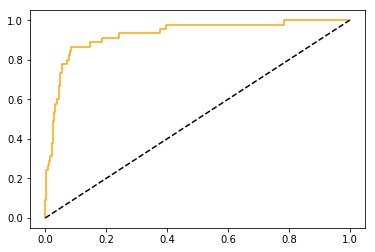

In [90]:
mybestpipeline = fitted_search.best_estimator_

y_test_proba = mybestpipeline.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='orange')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.show()

In [91]:
thresholds[tpr> 0.7]*100

array([8.07358161e+00, 7.81497814e+00, 7.76662883e+00, 7.22089921e+00,
       7.12163148e+00, 5.59658294e+00, 5.59131336e+00, 5.04008711e+00,
       5.01752123e+00, 4.96492429e+00, 4.93280719e+00, 4.55902724e+00,
       4.54605275e+00, 2.44270451e+00, 2.43152390e+00, 1.74301132e+00,
       1.73547864e+00, 1.07946616e+00, 1.07021185e+00, 4.33433223e-01,
       4.33373088e-01, 3.85450608e-01, 3.85277446e-01, 5.80721318e-02,
       5.80616564e-02, 3.19974087e-03])

In [92]:
y_pred_proba = (fitted_search.best_estimator_.predict_proba(X_test,)[:,1]>0.08).astype(bool)

print('Recall:', recall_score(y_test, y_pred_proba))
print('Precision:', precision_score(y_test, y_pred_proba))
print('f1:', f1_score(y_test, y_pred_proba))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_proba))

Recall: 0.7111111111111111
Precision: 0.22535211267605634
f1: 0.34224598930481287
Confusion Matrix:
 [[2160  110]
 [  13   32]]


In [93]:
X_train.columns

Index(['eFG%', 'ORB%', 'DRB%', 'FIC', 'PER', 'year', 'position', 'colyear'], dtype='object')

In [94]:
y_pred_proba.sum()

142

In [95]:
y_pred_proba_drafted = df_final_test[y_pred_proba ==1]
y_pred_proba_drafted['y_pred_prob'] = fitted_search.best_estimator_.predict_proba(X_test,)[:,1][y_pred_proba ==1]


In [96]:
y_pred_proba_drafted

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted,y_pred_prob
21380,1,Trae Young,OU,0.518,1.3,9.9,552.5,26.9,2018.0,1,1,5.0,1,0.891218
21383,4,R.J. Cole,HU,0.483,2.3,9.2,417.8,21.2,2018.0,1,1,0.0,0,0.325425
21385,6,Tremont Waters,LSU,0.506,1.1,10.8,387.8,20.5,2018.0,1,1,0.0,0,0.195078
21386,7,McKinley Wright,CU,0.489,5.9,10.1,358.5,18.8,2018.0,1,1,0.0,0,0.086042
21480,1,Zhaire Smith,TTU,0.588,9.5,11.1,396.6,21.5,2018.0,2,1,16.0,1,0.157976
21481,2,Kellan Grady,DAV,0.585,2.6,8.8,341.8,20.3,2018.0,2,1,0.0,0,0.118414
21482,3,Ja Morant,MSU,0.505,6.3,15.5,438.1,20.1,2018.0,2,1,0.0,0,0.267997
21483,4,Shai Gilgeous-Alexander,UK,0.516,3.2,10.0,443.6,20.1,2018.0,2,1,11.0,1,0.458876
21596,17,Gary Trent Jr.,DUKE,0.528,2.9,10.3,335.9,16.0,2018.0,3,1,37.0,1,0.107616
21662,1,Deandre Ayton,U of A,0.625,13.5,28.2,660.9,30.6,2018.0,4,1,1.0,1,0.928127


In [97]:
drafted = y_pred_proba_drafted.sort_values(by=['y_pred_prob'], ascending=False)

In [98]:
drafted

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted,y_pred_prob
21662,1,Deandre Ayton,U of A,0.625,13.5,28.2,660.9,30.6,2018.0,4,1,1.0,1,0.928127
21380,1,Trae Young,OU,0.518,1.3,9.9,552.5,26.9,2018.0,1,1,5.0,1,0.891218
21730,1,Marvin Bagley III,DUKE,0.640,13.7,21.4,594.1,28.3,2018.0,5,1,2.0,1,0.889815
22483,3,Jon Elmore,MU,0.526,1.2,14.1,607.9,22.3,2018.0,2,3,0.0,0,0.861049
22581,1,Mikal Bridges,VILL,0.623,5.2,13.8,556.0,25.4,2018.0,3,3,10.0,1,0.717913
23454,1,Jock Landale,SMC,0.644,12.6,26.8,614.6,31.7,2018.0,5,4,0.0,0,0.681459
22781,1,Mike Daum,SDSU,0.543,6.7,28.2,566.5,29.6,2018.0,5,3,0.0,0,0.672372
21663,2,Wendell Carter Jr.,DUKE,0.591,12.8,23.1,529.8,26.4,2018.0,4,1,7.0,1,0.603269
22586,6,John Konchar,IPFW,0.569,6.2,20.0,564.4,22.5,2018.0,3,3,0.0,0,0.586859
22683,3,Ajdin Penava,MU,0.610,7.6,22.1,553.5,25.9,2018.0,4,3,0.0,0,0.578501


In [99]:
df_drafted = drafted[drafted['drafted'].isin([1])]
df_drafted

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted,y_pred_prob
21662,1,Deandre Ayton,U of A,0.625,13.5,28.2,660.9,30.6,2018.0,4,1,1.0,1,0.928127
21380,1,Trae Young,OU,0.518,1.3,9.9,552.5,26.9,2018.0,1,1,5.0,1,0.891218
21730,1,Marvin Bagley III,DUKE,0.640,13.7,21.4,594.1,28.3,2018.0,5,1,2.0,1,0.889815
22581,1,Mikal Bridges,VILL,0.623,5.2,13.8,556.0,25.4,2018.0,3,3,10.0,1,0.717913
21663,2,Wendell Carter Jr.,DUKE,0.591,12.8,23.1,529.8,26.4,2018.0,4,1,7.0,1,0.603269
23067,14,Devonte' Graham,KU,0.510,2.0,9.6,558.5,20.2,2018.0,1,4,34.0,1,0.576671
22383,3,Jalen Brunson,VILL,0.604,1.2,9.7,513.2,24.7,2018.0,1,3,33.0,1,0.535210
23056,3,Jevon Carter,WVU,0.498,2.4,13.2,553.9,23.7,2018.0,1,4,32.0,1,0.520370
21483,4,Shai Gilgeous-Alexander,UK,0.516,3.2,10.0,443.6,20.1,2018.0,2,1,11.0,1,0.458876
22027,4,Tony Carr,PSU,0.482,3.0,13.5,459.5,21.3,2018.0,3,2,51.0,1,0.445794


## Analyzing results and next steps 

#### Looking at the results of the model. It seems to understand weather the player will be selected better than the rank of each player. The rank of the player or how each team might select their future prospect doesn't only relay on the stats above. Player game IQ, combine results (tryout by each team), and interviews conducted for each players. All determine/effect player ranking.  The potential growth of each player once entering the NBA also effects the results. 
#### Unfortunately data on player game IQ, combine results (tryout by each team), and interviews conducted for each players are all not available to include in the model 
#### Next steps to have a better model would be:
- look at each NBA team needs and fit the players accordingly
- Predict the player performance in their first few years in the NBA 

## lets test this on 2019 Draft 

In [100]:
#get the 2019 data
df_19 = df_final[df_final['year'].isin([2019])]
df_19.head()

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted
23742,1,Jalen Pickett,SC,0.513,4.4,11.9,482.5,24.2,2019.0,1,1,0.0,0
23743,2,Darius Quisenberry,YSU,0.484,1.5,11.1,268.1,19.3,2019.0,1,1,0.0,0
23744,3,Coby White,UNC,0.516,1.3,11.4,341.2,18.6,2019.0,1,1,0.0,0
23745,4,Malachi Smith,WRST,0.455,8.0,14.8,166.9,17.9,2019.0,1,1,0.0,0
23746,5,Daivien Williamson,ETSU,0.575,1.6,8.7,213.6,17.9,2019.0,1,1,0.0,0


In [101]:
Missing_draft_list = df_19[df_19['Player'].isin(['Cameron Johnson','Matisse Thybulle','Dylan Windler',
                            'Justin James','Eric Paschall','Admiral Schofield',
                            'Terance Mann','Quinndary Weatherspoon','Jarrell Brantley',
                            'Justin Wright-Foreman','Marial Shayok','Kezie Okpala'])]
Missing_draft_list

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted
24451,17,Kezie Okpala,SU,0.507,4.1,14.9,262.6,17.4,2019.0,3,2,0.0,0
25640,1,Justin Wright-Foreman,HOF,0.596,1.2,11.5,509.5,27.4,2019.0,2,4,0.0,0
25649,10,Marial Shayok,ISU,0.573,5.1,11.7,362.4,21.3,2019.0,2,4,0.0,0
25740,1,Dylan Windler,BEL,0.651,6.8,27.3,643.4,29.0,2019.0,3,4,0.0,0
25745,6,Cameron Johnson,UNC,0.621,6.5,13.3,485.0,23.6,2019.0,3,4,0.0,0
25748,9,Quinndary Weatherspoon,MSU,0.574,4.7,11.6,404.6,22.8,2019.0,3,4,0.0,0
25754,15,Justin James,UW,0.454,3.2,22.2,439.8,20.9,2019.0,3,4,0.0,0
25766,27,Admiral Schofield,UT,0.548,4.5,16.4,390.2,19.4,2019.0,3,4,0.0,0
25770,31,Matisse Thybulle,UW,0.500,3.0,8.9,358.4,18.7,2019.0,3,4,0.0,0
25841,2,Jarrell Brantley,C of C,0.559,6.6,24.2,482.9,26.9,2019.0,4,4,0.0,0


In [102]:
# players that declared to be part of the Draft
df_19_dec = pd.read_csv("2019 draft/2019 EC Draft.csv")
df_19_dec.shape

(99, 2)

In [103]:
# merge with players that declared to be part of the Draft
df_19_list = pd.merge(df_19, df_19_dec, how='left', on=['Player'])
df_19_list = df_19_list[df_19_list['Declared'].isin(['yes'])]
df_19_list

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted,Declared
2,3,Coby White,UNC,0.516,1.3,11.4,341.2,18.6,2019.0,1,1,0.0,0,yes
100,1,R.J. Barrett,DUKE,0.506,4.8,17.2,536.2,22.5,2019.0,2,1,0.0,0,yes
102,3,Darius Garland,VU,0.639,1.6,11.7,49.8,20.1,2019.0,2,1,0.0,0,yes
104,5,Tyler Herro,UK,0.536,1.6,13.9,370.6,18.7,2019.0,2,1,0.0,0,yes
201,2,Nassir Little,UNC,0.504,9.2,16.9,232.2,19.1,2019.0,3,1,0.0,0,yes
202,3,Romeo Langford,IU,0.491,4.9,12.8,327.2,19.0,2019.0,3,1,0.0,0,yes
207,8,Keldon Johnson,UK,0.521,5.5,16.4,328.6,17.9,2019.0,3,1,0.0,0,yes
212,13,Louis King,UO,0.522,5.4,17.0,242.4,17.1,2019.0,3,1,0.0,0,yes
214,15,Talen Horton-Tucker,ISU,0.470,2.9,16.8,278.2,16.7,2019.0,3,1,0.0,0,yes
219,20,Luguentz Dort,ASU,0.467,4.5,10.1,254.6,16.0,2019.0,3,1,0.0,0,yes


In [104]:
df_19_list.to_csv('df_19_list.csv', header=True, index=False)

In [105]:
#split the data to knowa
X_test_new = df_19_list.iloc[:,3:-3]
y_test_new = df_19_list.iloc[:, -3]

In [106]:
scaler = StandardScaler()
scaler.fit(X_test_new)
#X_test_new = scaler.transform(X_test_new)
X_test_new = pd.DataFrame(scaler.transform(X_test_new), columns=X_test_new.columns)
X_test_new

,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear
0,-0.364047,-1.239239,-0.882409,-0.219182,-0.456285,0.0,-1.697405,-1.427523
1,-0.531211,-0.228525,0.331873,1.415521,0.391101,0.0,-0.898046,-1.427523
2,1.692076,-1.152607,-0.819601,-2.662013,-0.130367,0.0,-0.898046,-1.427523
3,-0.029718,-1.152607,-0.359012,0.027281,-0.434557,0.0,-0.898046,-1.427523
4,-0.564644,1.042088,0.269065,-1.132938,-0.347646,0.0,-0.098686,-1.427523
5,-0.781958,-0.199647,-0.589306,-0.336545,-0.369373,0.0,-0.098686,-1.427523
6,-0.280465,-0.026382,0.164385,-0.324808,-0.608380,0.0,-0.098686,-1.427523
7,-0.263748,-0.055260,0.290001,-1.047431,-0.782203,0.0,-0.098686,-1.427523
8,-1.133003,-0.777198,0.248129,-0.747316,-0.869114,0.0,-0.098686,-1.427523
9,-1.183153,-0.315158,-1.154575,-0.945157,-1.021209,0.0,-0.098686,-1.427523


In [107]:
#using our best model to predict 2019 data
y_pred_proba = (fitted_search.best_estimator_.predict_proba(X_test_new,)[:,1]).astype(bool)

In [108]:
y_pred_proba.sum()

81

In [109]:
y_pred_proba_drafted = df_19_list[y_pred_proba ==1]
y_pred_proba_drafted.head()

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted,Declared
2,3,Coby White,UNC,0.516,1.3,11.4,341.2,18.6,2019.0,1,1,0.0,0,yes
100,1,R.J. Barrett,DUKE,0.506,4.8,17.2,536.2,22.5,2019.0,2,1,0.0,0,yes
102,3,Darius Garland,VU,0.639,1.6,11.7,49.8,20.1,2019.0,2,1,0.0,0,yes
104,5,Tyler Herro,UK,0.536,1.6,13.9,370.6,18.7,2019.0,2,1,0.0,0,yes
201,2,Nassir Little,UNC,0.504,9.2,16.9,232.2,19.1,2019.0,3,1,0.0,0,yes


In [110]:
y_pred_proba_drafted['y_pred_prob'] = fitted_search.best_estimator_.predict_proba(X_test_new,)[:,1][y_pred_proba ==1]

In [111]:
y_pred_proba_drafted

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted,Declared,y_pred_prob
2,3,Coby White,UNC,0.516,1.3,11.4,341.2,18.6,2019.0,1,1,0.0,0,yes,0.003554
100,1,R.J. Barrett,DUKE,0.506,4.8,17.2,536.2,22.5,2019.0,2,1,0.0,0,yes,0.059403
102,3,Darius Garland,VU,0.639,1.6,11.7,49.8,20.1,2019.0,2,1,0.0,0,yes,0.000045
104,5,Tyler Herro,UK,0.536,1.6,13.9,370.6,18.7,2019.0,2,1,0.0,0,yes,0.006151
201,2,Nassir Little,UNC,0.504,9.2,16.9,232.2,19.1,2019.0,3,1,0.0,0,yes,0.000415
202,3,Romeo Langford,IU,0.491,4.9,12.8,327.2,19.0,2019.0,3,1,0.0,0,yes,0.004027
207,8,Keldon Johnson,UK,0.521,5.5,16.4,328.6,17.9,2019.0,3,1,0.0,0,yes,0.002493
212,13,Louis King,UO,0.522,5.4,17.0,242.4,17.1,2019.0,3,1,0.0,0,yes,0.000579
214,15,Talen Horton-Tucker,ISU,0.470,2.9,16.8,278.2,16.7,2019.0,3,1,0.0,0,yes,0.001365
219,20,Luguentz Dort,ASU,0.467,4.5,10.1,254.6,16.0,2019.0,3,1,0.0,0,yes,0.001446


In [112]:
draft_19_pred = y_pred_proba_drafted.sort_values(by=['y_pred_prob'], ascending=False)

In [141]:
draft_19_pred['Pick'] = draft_19_pred['y_pred_prob'].rank(ascending=False)
draft_19_pred['drafted'] = 1
draft_19_pred

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted,Declared,y_pred_prob
287,1,Zion Williamson,DUKE,0.708,12.7,18.2,677.4,37.8,2019.0,4,1,1.0,1,yes,0.530386
439,1,Ja Morant,MSU,0.553,3.9,12.7,680.8,29.9,2019.0,1,2,2.0,1,yes,0.384491
1298,1,Brandon Clarke,GU,0.693,13.9,19.7,683.4,34.6,2019.0,4,3,3.0,1,yes,0.212978
1299,2,Grant Williams,UT,0.582,8.5,17.3,592.2,28.8,2019.0,4,3,4.0,1,yes,0.094157
100,1,R.J. Barrett,DUKE,0.506,4.8,17.2,536.2,22.5,2019.0,2,1,5.0,1,yes,0.059403
1401,4,Rui Hachimura,GU,0.608,5.9,17.0,503.0,27.3,2019.0,5,3,6.0,1,yes,0.039791
1935,1,Dylan Windler,BEL,0.651,6.8,27.3,643.4,29.0,2019.0,3,4,7.0,1,yes,0.038326
1301,4,Dedric Lawson,KU,0.525,11.0,23.2,562.1,27.0,2019.0,4,3,8.0,1,yes,0.028167
640,2,Jarrett Culver,TTU,0.505,5.7,17.2,489.0,24.1,2019.0,3,2,9.0,1,yes,0.025189
846,8,Chuma Okeke,AU,0.577,10.6,16.9,477.0,23.0,2019.0,5,2,10.0,1,yes,0.024029


In [114]:
# as the college year effects the results of the player.. wanted to take a look at the rank
# for SOF and FR players
draft_19_pred_SOF_FR = draft_19_pred[draft_19_pred['colyear'].isin([1,2])]
draft_19_pred_SOF_FR['Pick'] = draft_19_pred_SOF_FR['y_pred_prob'].rank(ascending=False)
draft_19_pred_SOF_FR

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted,Declared,y_pred_prob
287,1,Zion Williamson,DUKE,0.708,12.7,18.2,677.4,37.8,2019.0,4,1,1.0,1,yes,0.530386
439,1,Ja Morant,MSU,0.553,3.9,12.7,680.8,29.9,2019.0,1,2,2.0,1,yes,0.384491
100,1,R.J. Barrett,DUKE,0.506,4.8,17.2,536.2,22.5,2019.0,2,1,3.0,1,yes,0.059403
640,2,Jarrett Culver,TTU,0.505,5.7,17.2,489.0,24.1,2019.0,3,2,4.0,1,yes,0.025189
846,8,Chuma Okeke,AU,0.577,10.6,16.9,477.0,23.0,2019.0,5,2,5.0,1,yes,0.024029
843,5,Bruno Fernando,UMD,0.612,12.0,27.5,503.4,25.6,2019.0,5,2,6.0,1,yes,0.013842
747,9,De'Andre Hunter,UVA,0.579,5.6,13.3,411.4,23.1,2019.0,4,2,7.0,1,yes,0.013078
841,3,Daniel Gafford,U of A,0.660,11.2,22.7,452.1,26.7,2019.0,5,2,8.0,1,yes,0.010343
645,7,Nickeil Alexander-Walker,VT,0.546,1.8,13.0,384.5,20.9,2019.0,3,2,9.0,1,yes,0.007808
742,4,P.J. Washington,UK,0.567,10.1,19.7,433.5,24.6,2019.0,4,2,10.0,1,yes,0.007778


##  Export Data to Visualize   

In [115]:
#merge 2019 draft predictions to the rest of the data
#first drop columns (Declared & y_pred proba)
draft_19_pred_clean = draft_19_pred.drop(['Declared','y_pred_prob'], axis = 1)
draft_19_pred_clean.head()

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted
287,1,Zion Williamson,DUKE,0.708,12.7,18.2,677.4,37.8,2019.0,4,1,1.0,1
439,1,Ja Morant,MSU,0.553,3.9,12.7,680.8,29.9,2019.0,1,2,2.0,1
1298,1,Brandon Clarke,GU,0.693,13.9,19.7,683.4,34.6,2019.0,4,3,3.0,1
1299,2,Grant Williams,UT,0.582,8.5,17.3,592.2,28.8,2019.0,4,3,4.0,1
100,1,R.J. Barrett,DUKE,0.506,4.8,17.2,536.2,22.5,2019.0,2,1,5.0,1


In [116]:
draft_19_pred_clean.to_csv('2019_Draft_Adv_pred.csv', header=True, index=False)

In [117]:
#get table with the history of drafted payers
df_final_hist = df_final[df_final['year'].isin([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])]
df_final_hist_drafted = df_final_hist[df_final_hist['drafted'].isin([1])]
df_final_hist_drafted.head() 

,#,Player,Team_x,eFG%,ORB%,DRB%,FIC,PER,year,position,colyear,Pick,drafted
101,2,Tyreke Evans,UM,0.489,4.9,15.1,412.2,24.1,2009.0,2,1,4.0,1
112,13,Jrue Holiday,UCLA,0.504,5.8,11.9,288.9,17.3,2009.0,2,1,17.0,1
211,12,DeMar DeRozan,USC,0.531,9.1,11.7,312.2,18.5,2009.0,3,1,9.0,1
337,2,Byron Mullens,OSU,0.638,11.5,17.2,222.4,21.8,2009.0,5,1,24.0,1
412,1,Jeff Teague,WF,0.546,1.7,8.6,353.9,23.0,2009.0,1,2,19.0,1


In [118]:
#now merge hist draft results with 2019 pred draft results tables
Draft_results = pd.concat([df_final_hist_drafted,draft_19_pred_clean])
Draft_results.shape

(532, 13)

In [119]:
#All data
Draft_results_all = pd.concat([df_final_hist,draft_19_pred_clean])
Draft_results.shape

(532, 13)

In [120]:
Draft_results_all.to_csv('Draft_results_All_Adv_pred.csv', header=True, index=False)

In [123]:
print(df_final_hist_drafted.shape)
print(draft_19_pred_clean.shape)

(451, 13)
(81, 13)


In [124]:
Draft_results.to_csv('Draft_results_Adv_pred.csv', header=True, index=False)

### Check the most similar players to the top 5 2019 draft picks

In [125]:
# first we have to scale the data
Stats_scaled = Draft_results[['eFG%','ORB%','DRB%','FIC','PER']].copy()

In [126]:
Stats_scaled.head()

,eFG%,ORB%,DRB%,FIC,PER
101,0.489,4.9,15.1,412.2,24.1
112,0.504,5.8,11.9,288.9,17.3
211,0.531,9.1,11.7,312.2,18.5
337,0.638,11.5,17.2,222.4,21.8
412,0.546,1.7,8.6,353.9,23.0


In [127]:
scaler = StandardScaler()
scaler.fit(Stats_scaled)
#Stats_scaled[Stats_scaled.columns] = scaler.fit_transform(Stats_scaled[Stats_scaled.columns])
Stats_scaled = pd.DataFrame(scaler.transform(Stats_scaled), columns=Stats_scaled.columns,index =Stats_scaled.index )
Stats_scaled.head()

,eFG%,ORB%,DRB%,FIC,PER
101,-1.055649,-0.460274,-0.210293,0.028767,0.394269
112,-0.756509,-0.240729,-0.771777,-1.143360,-1.200084
211,-0.218057,0.564269,-0.806870,-0.921863,-0.918727
337,1.915808,1.149721,0.158181,-1.775530,-0.144997
412,0.081083,-1.240877,-1.350808,-0.525450,0.136359


In [128]:
#add the player name and position to the scaled data
Stats_scaled['Player'] = Draft_results['Player']
Stats_scaled['position'] = Draft_results['position']

In [129]:
Stats_scaled.head()

,eFG%,ORB%,DRB%,FIC,PER,Player,position
101,-1.055649,-0.460274,-0.210293,0.028767,0.394269,Tyreke Evans,2
112,-0.756509,-0.240729,-0.771777,-1.143360,-1.200084,Jrue Holiday,2
211,-0.218057,0.564269,-0.806870,-0.921863,-0.918727,DeMar DeRozan,3
337,1.915808,1.149721,0.158181,-1.775530,-0.144997,Byron Mullens,5
412,0.081083,-1.240877,-1.350808,-0.525450,0.136359,Jeff Teague,1


In [130]:
#assing the player name as the index column
Stats_scaled.index = Stats_scaled['Player'] 
Stats_scaled.head()

,eFG%,ORB%,DRB%,FIC,PER,Player,position
Player,,,,,,,
Tyreke Evans,-1.055649,-0.460274,-0.210293,0.028767,0.394269,Tyreke Evans,2
Jrue Holiday,-0.756509,-0.240729,-0.771777,-1.143360,-1.200084,Jrue Holiday,2
DeMar DeRozan,-0.218057,0.564269,-0.806870,-0.921863,-0.918727,DeMar DeRozan,3
Byron Mullens,1.915808,1.149721,0.158181,-1.775530,-0.144997,Byron Mullens,5
Jeff Teague,0.081083,-1.240877,-1.350808,-0.525450,0.136359,Jeff Teague,1


In [131]:
# drop the player column
Stats_scaled = Stats_scaled.drop(['Player'],axis=1)
#df.drop(['B', 'C'], axis=1)

In [132]:
Stats_scaled.shape

(532, 6)

In [133]:
#check the top 5 players results
Top_5 = []
player = ('Zion Williamson','Ja Morant','Brandon Clarke','Grant Williams','R.J. Barrett')
for i in player:
    X = np.array(Stats_scaled.loc[i,:])
    Top_5.append(X)  
Top_5

[array([3.31179413, 1.44244753, 0.33364523, 2.54984005, 3.60642166,
        4.        ]),
 array([ 0.22068131, -0.70421226, -0.63140612,  2.58216149,  1.75415856,
         1.        ]),
 array([3.01265418, 1.73517387, 0.59684105, 2.60687789, 2.85613788,
        4.        ]),
 array([0.79901855, 0.41790536, 0.17572774, 1.73990265, 1.49624851,
        4.        ]),
 array([-0.71662386, -0.48466751,  0.15818135,  1.20754943,  0.0191273 ,
         2.        ])]

In [134]:
# assign each array with the player name
Zion_Williamson = np.array(Stats_scaled.loc['Zion Williamson',:])
Ja_Morant = np.array(Stats_scaled.loc['Ja Morant',:])
Brandon_Clarke = np.array(Stats_scaled.loc['Brandon Clarke',:])
Grant_Williams = np.array(Stats_scaled.loc['Grant Williams',:])
RJ_Barrett = np.array(Stats_scaled.loc['R.J. Barrett',:])

In [135]:
# list of all drafted players scales
list_of_players = Stats_scaled.values
list_of_players.shape

(532, 6)

### Check the most similar players using the euclidean distance

In [136]:
Zion_difference = []
for i,j in enumerate(list_of_players):
    Diff = np.linalg.norm(Zion_Williamson-j)
    player_name = Stats_scaled.index[i]
    Zion_difference.append([Diff,player_name])
#difference = pd.DataFrame(difference)

Zion = pd.DataFrame(Zion_difference)

Zion_sorted = Zion.sort_values(by=0,ascending=[True])
Zion_sorted.head(10)

,0,1
451,0.000000,Zion Williamson
453,0.900347,Brandon Clarke
147,2.629509,Anthony Davis
105,2.737946,Derrick Williams
338,2.875036,Jakob Poeltl
283,2.906697,Jahlil Okafor
213,2.910964,Kelly Olynyk
415,2.954840,Deandre Ayton
419,2.966847,Marvin Bagley III
381,2.973577,John Collins


In [137]:
Ja_diff = []
for i,j in enumerate(list_of_players):
    Diff = np.linalg.norm(Ja_Morant-j)
    player_name = Stats_scaled.index[i]
    Ja_diff.append([Diff,player_name])
#difference = pd.DataFrame(difference)

Ja = pd.DataFrame(Ja_diff)

Ja_sorted = Ja.sort_values(by=0,ascending=[True])
Ja_sorted.head(10)

,0,1
452,0.000000,Ja Morant
215,1.070761,Nate Wolters
341,1.441521,Kay Felder
12,1.505363,Stephen Curry
195,1.606911,Trey Burke
121,1.638203,Jimmer Fredette
107,1.683541,Kemba Walker
285,1.744739,Cameron Payne
406,1.764414,Trae Young
162,1.798231,Damian Lillard


In [138]:
Brandon_diff = []
for i,j in enumerate(list_of_players):
    Diff = np.linalg.norm(Brandon_Clarke-j)
    player_name = Stats_scaled.index[i]
    Brandon_diff.append([Diff,player_name])
#difference = pd.DataFrame(difference)

Brandon = pd.DataFrame(Brandon_diff)

Brandon_sorted = Brandon.sort_values(by=0,ascending=[True])
Brandon_sorted.head(10)

,0,1
453,0.000000,Brandon Clarke
451,0.900347,Zion Williamson
147,2.186826,Anthony Davis
105,2.205595,Derrick Williams
415,2.235678,Deandre Ayton
419,2.260766,Marvin Bagley III
338,2.268883,Jakob Poeltl
283,2.307603,Jahlil Okafor
355,2.416027,Brice Johnson
381,2.444814,John Collins


In [139]:
Grant_diff = []
for i,j in enumerate(list_of_players):
    Diff = np.linalg.norm(Grant_Williams-j)
    player_name = Stats_scaled.index[i]
    Grant_diff.append([Diff,player_name])
#difference = pd.DataFrame(difference)

Grant = pd.DataFrame(Grant_diff)

Grant_sorted = Grant.sort_values(by=0,ascending=[True])
Grant_sorted.head(10)

,0,1
454,0.000000,Grant Williams
38,0.791183,DeMarre Carroll
178,0.833824,Jae Crowder
267,1.161014,Cameron Bairstow
116,1.246430,Marcus Morris
59,1.250782,Luke Babbitt
271,1.352294,Doug McDermott
85,1.378352,Quincy Pondexter
309,1.378471,Aaron White
229,1.488665,Jeff Withey


In [140]:
RJ_Barrett_Diff = []
for i,j in enumerate(list_of_players):
    Diff = np.linalg.norm(RJ_Barrett-j)
    player_name = Stats_scaled.index[i]
    RJ_Barrett_Diff.append([Diff,player_name])
#difference = pd.DataFrame(difference)

RJ = pd.DataFrame(RJ_Barrett_Diff)

RJ_Barrett_sorted = RJ.sort_values(by=0,ascending=[True])
RJ_Barrett_sorted.head(10)

,0,1
455,0.000000,R.J. Barrett
260,0.733008,Shabazz Napier
387,0.947546,Nigel Williams-Goss
79,0.996283,Da'Sean Butler
344,1.062484,DeAndre' Bembry
275,1.127154,D'Angelo Russell
459,1.179262,Jarrett Culver
241,1.199793,Marcus Smart
203,1.208919,Ray McCallum
66,1.227026,Dominique Jones
